In [1]:
import pandas as pd
import numpy as np

In [2]:
metrics_df = pd.read_csv('../data/processed/run_plays_12-3_0.csv')

## Tackle Type
Remove forcedFumbles because the tackler (by definition) does not complete a tackle on the ball carrier. This leaves ambiguity about the ability for the tackler to bring the ball carrier down.

Assists are mapped to tackles.
- Another option to consider: removing all plays where there is an assist. This could make tackles more clear when only one player is amkeing or missing a tackle

In [3]:
metrics_df['event'].replace('assist', 'tackle', inplace=True)

In [4]:
metrics_df.drop(metrics_df[metrics_df['event'] == 'forcedFumble'].index, inplace=True)

## Time to Contact
One tackler had a speed of 0 at the frame of interest. This causes the time to contact to be infinite. To avoid errors in plotting, this infinite value is replaced with 1000.

In [5]:
metrics_df['tackler_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)

In [6]:
# must be within field of play, and less than 5 seconds from contact point at current speed
metrics_df['make_contact'] = ((metrics_df['x_contact'] < 110) & 
                              (metrics_df['x_contact'] > 0) &
                              (abs(metrics_df['diff_time_to_contact']) < 5)
                             )

## Momentum
The momentum_x_diff is calculated by subtracting the tackler x momentum from the ball carrier x momentum. But the tackler "should" be moving in the opposite direction as the ball carrier, so the tackler momentum "should" be negative. To acheive the correct signs at the end of the calculation the momentums in the x direction should be added.

In [7]:
metrics_df['momentum_x_add'] = metrics_df['momentum_x_ball_carrier'] + metrics_df['momentum_x']

# Plotting

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def hist(df, metric):
    sns.histplot(df, x=metric, hue="event", kde=True)
    plt.show()

In [10]:
def violin(df, metric):
    sns.violinplot(df, x=metric, y="event")
    plt.show()

In [11]:
def box(df, metric):
    sns.boxplot(df, x=metric, y="event")
    plt.show()

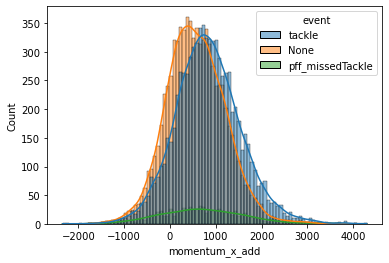

In [12]:
hist(metrics_df, "momentum_x_add")

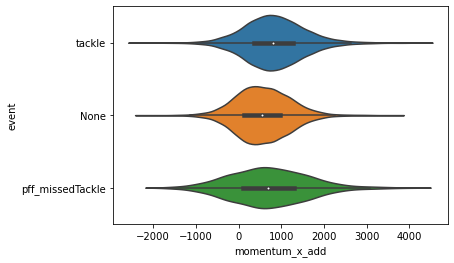

In [13]:
violin(metrics_df, "momentum_x_add")

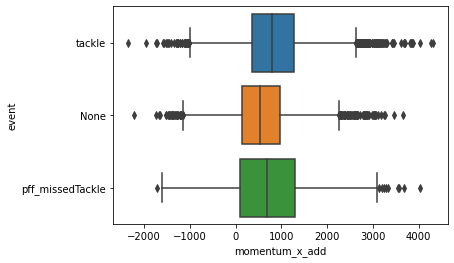

In [14]:
box(metrics_df, "momentum_x_add")

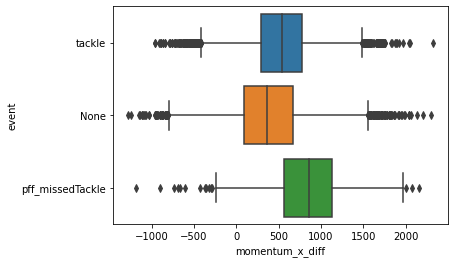

In [15]:
box(metrics_df, "momentum_x_diff")

In [16]:
metrics_df.columns

Index(['gameId', 'playId', 'event', 'nflId', 'frameId', 'displayName', 'club',
       'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'dir_cos', 'dir_sin', 'dir_tan',
       'slope', 'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase', 'nflId_ball_carrier',
       'displayName_ball_carrier', 'club_ball_carrier', 'x_ball_carrier',
       'y_ball_carrier', 's_ball_carrier', 'a_ball_carrier',
       'dis_ball_carrier', 'o_ball_carrier', 'dir_ball_carrier',
       'dir_cos_ball_carrier', 'dir_sin_ball_carrier', 'dir_tan_ball_carrier',
       'slope_ball_carrier', 'force_ball_carrier', 'force_x_ball_carrier',
       'force_y_ball_carrier', 'momentum_ball_carrier',
       'momentum_x_ball_carrier', 'momentum_y_ball_carrier',
       'in_phase_ball_carrier', 'tackler_to_ball_carrier_dist', 'force_diff',
       'force_x_diff', 'force_y_diff', 'momentum_diff', 'momentum_x_diff',
       'momentum_y_diff', 'x_contact', 'y_contact', 'contact_y_check',
       'tackler_to_

In [28]:
single_player_metric_columns = [
       'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase', 'x_ball_carrier',
       'y_ball_carrier', 's_ball_carrier', 'a_ball_carrier',
       'dis_ball_carrier', 'o_ball_carrier', 'dir_ball_carrier',
       'force_ball_carrier', 'force_x_ball_carrier',
       'force_y_ball_carrier', 'momentum_ball_carrier',
       'momentum_x_ball_carrier', 'momentum_y_ball_carrier',
       'contact_angle_cos', 'contact_angle_force']
player_diff_metric_columns = [
       'tackler_to_ball_carrier_dist', 'force_diff', 'force_x_diff',
       'force_y_diff', 'momentum_diff', 'momentum_x_diff', 'momentum_y_diff',
       'x_contact', 'y_contact', 'tackler_to_contact_dist',
       'ball_carrier_to_contact_dist', 'tackler_time_to_contact',
       'ball_carrier_time_to_contact', 'diff_time_to_contact', 'contact_angle',
       'contact_angle_force_diff']

x


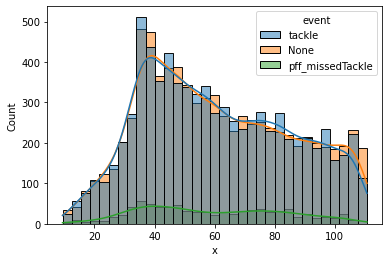

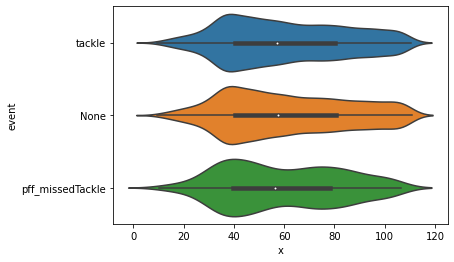

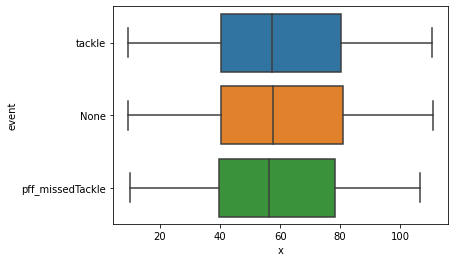

----------------------------------------------------
----------------------------------------------------
y


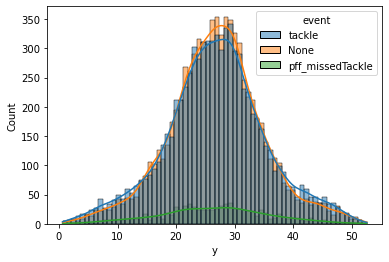

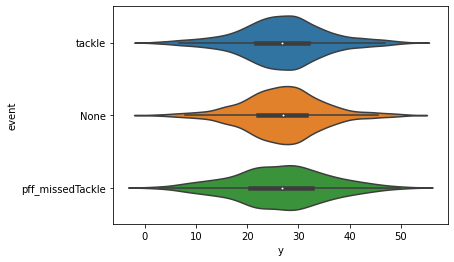

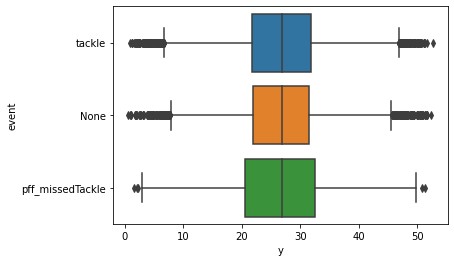

----------------------------------------------------
----------------------------------------------------
s


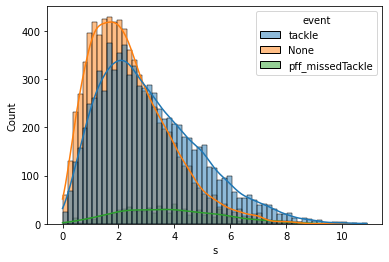

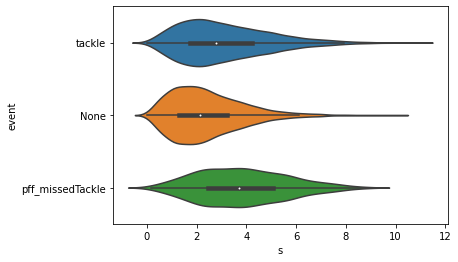

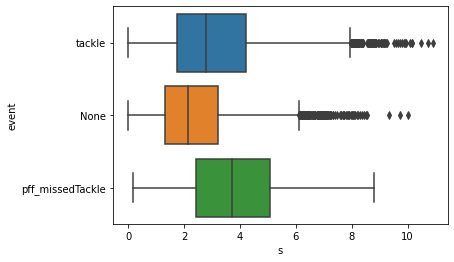

----------------------------------------------------
----------------------------------------------------
a


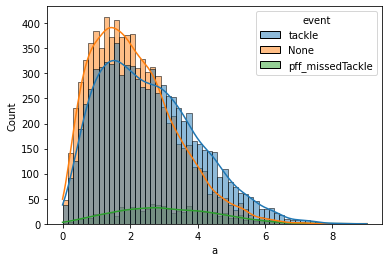

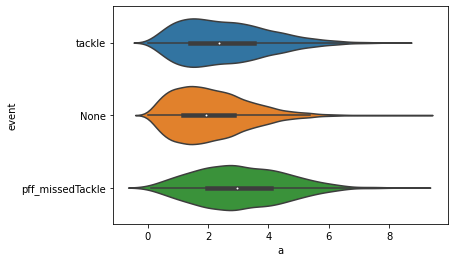

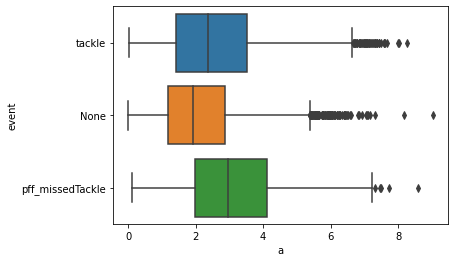

----------------------------------------------------
----------------------------------------------------
dis


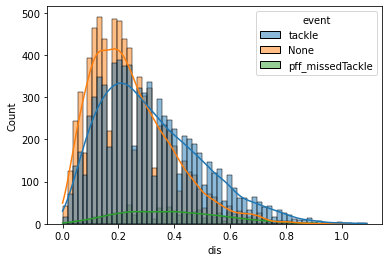

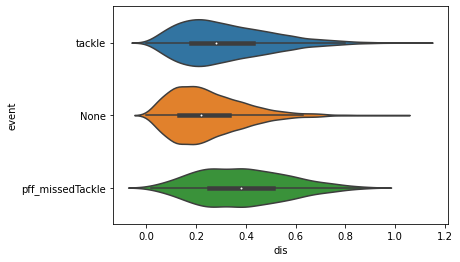

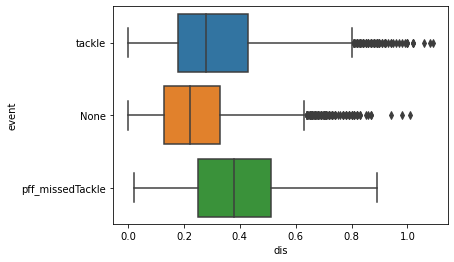

----------------------------------------------------
----------------------------------------------------
o


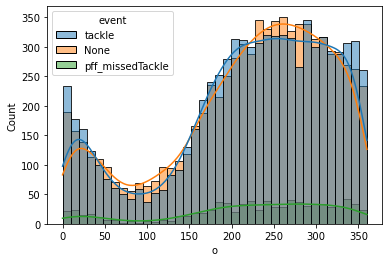

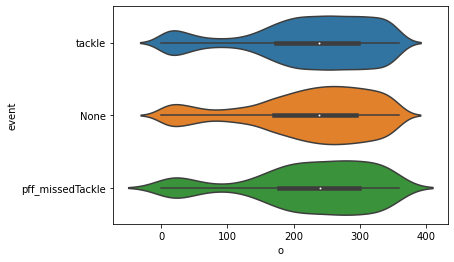

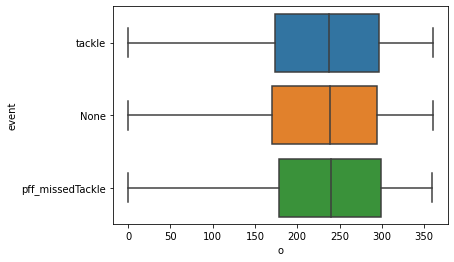

----------------------------------------------------
----------------------------------------------------
dir


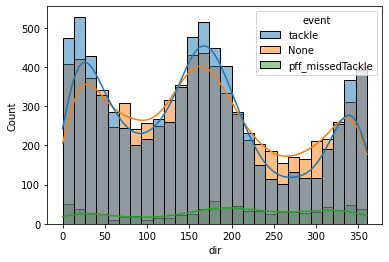

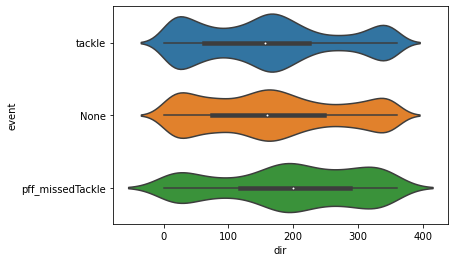

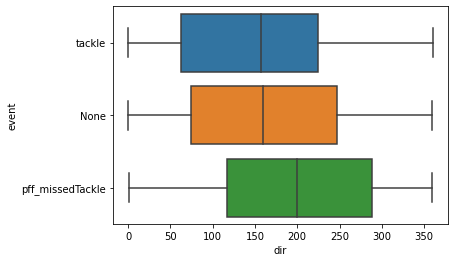

----------------------------------------------------
----------------------------------------------------
force


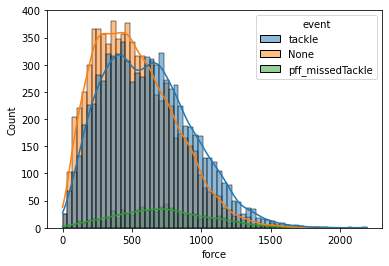

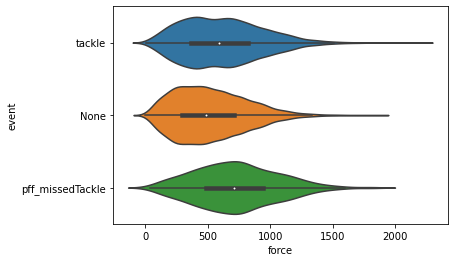

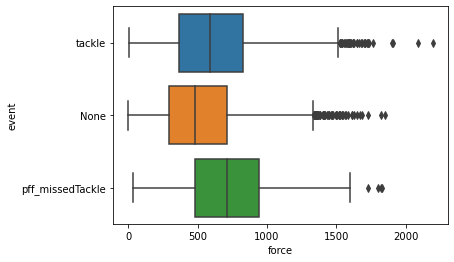

----------------------------------------------------
----------------------------------------------------
force_x


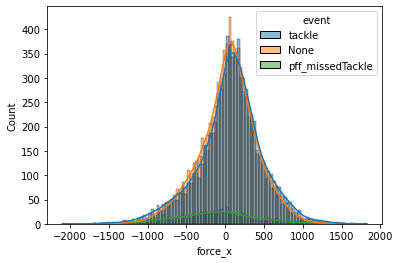

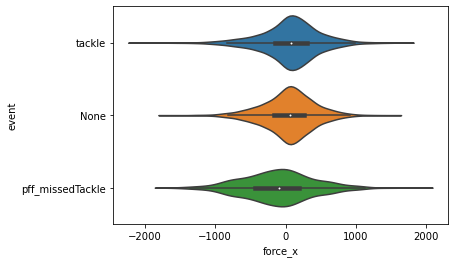

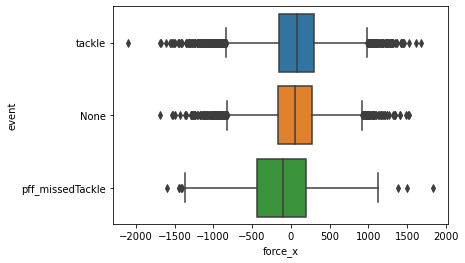

----------------------------------------------------
----------------------------------------------------
force_y


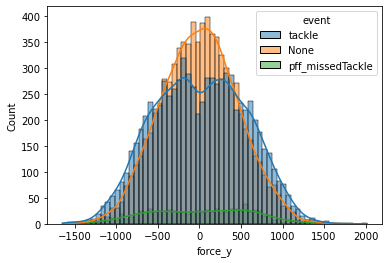

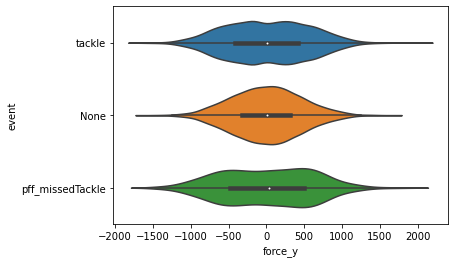

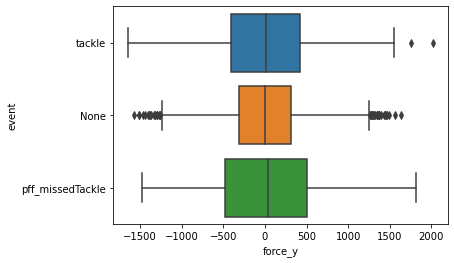

----------------------------------------------------
----------------------------------------------------
momentum


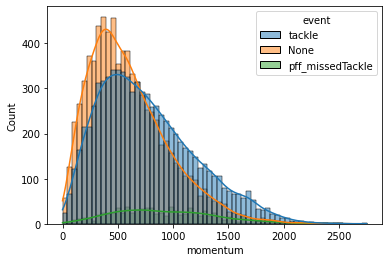

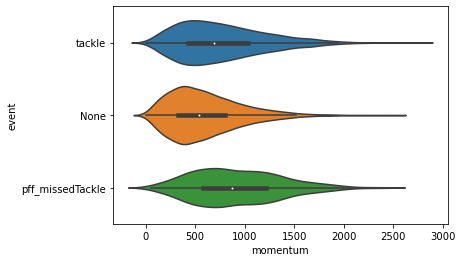

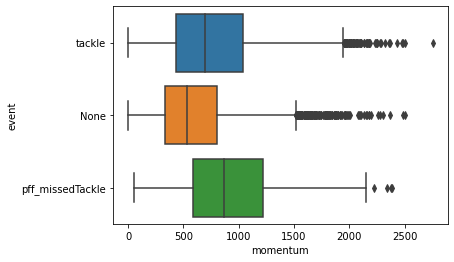

----------------------------------------------------
----------------------------------------------------
momentum_x


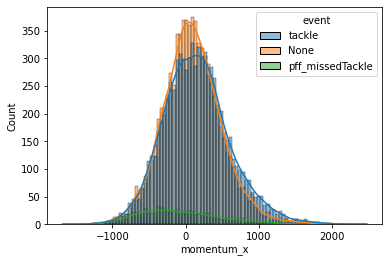

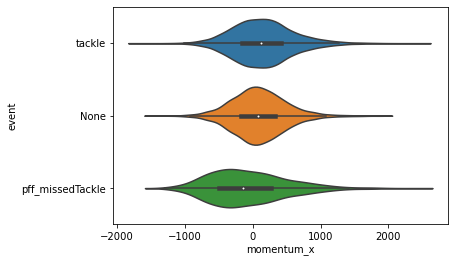

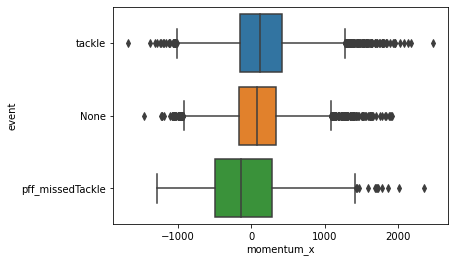

----------------------------------------------------
----------------------------------------------------
momentum_y


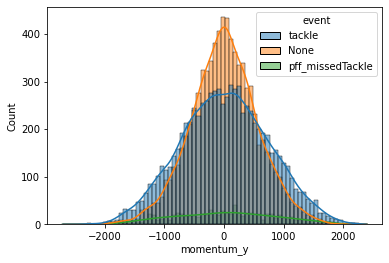

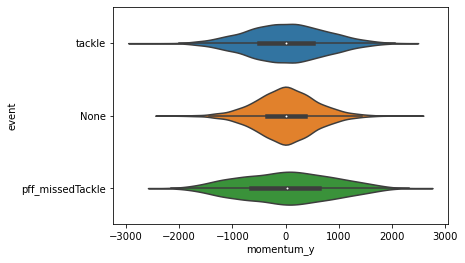

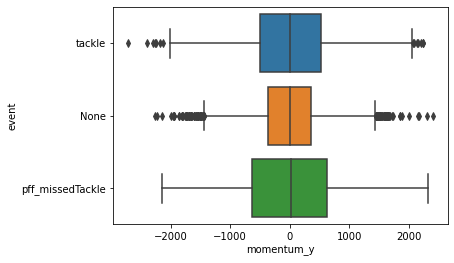

----------------------------------------------------
----------------------------------------------------
in_phase


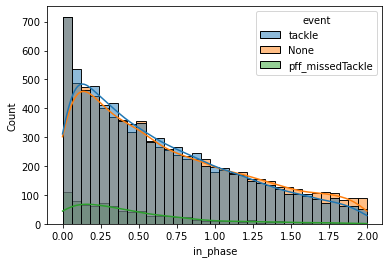

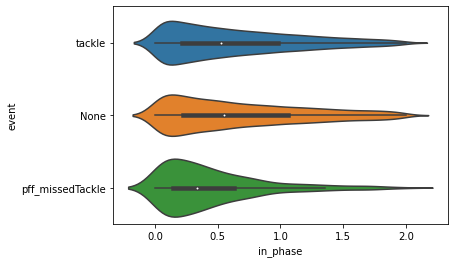

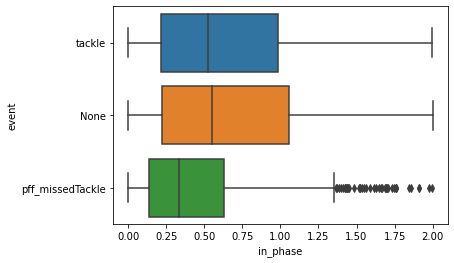

----------------------------------------------------
----------------------------------------------------
x_ball_carrier


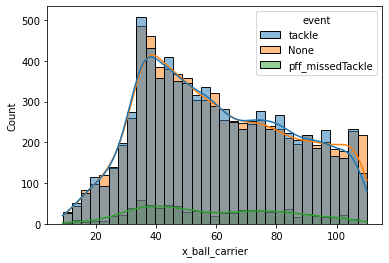

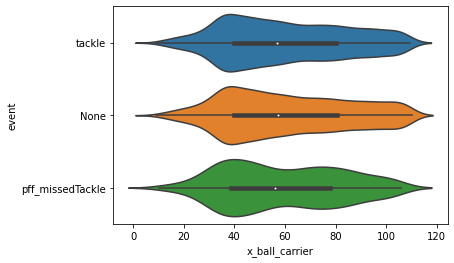

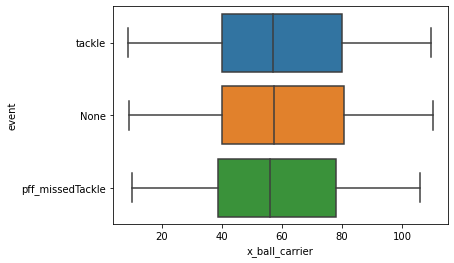

----------------------------------------------------
----------------------------------------------------
y_ball_carrier


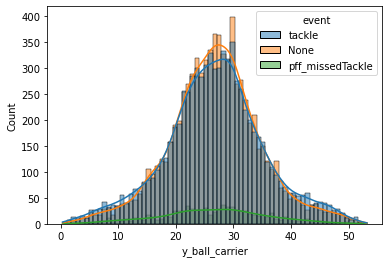

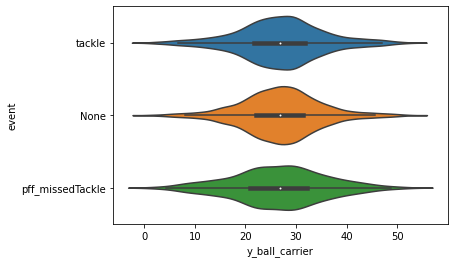

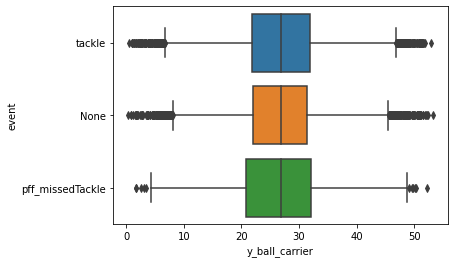

----------------------------------------------------
----------------------------------------------------
s_ball_carrier


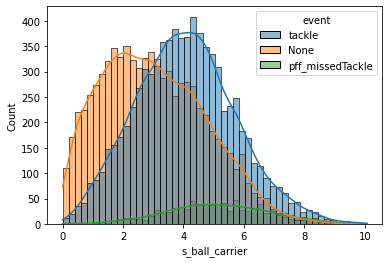

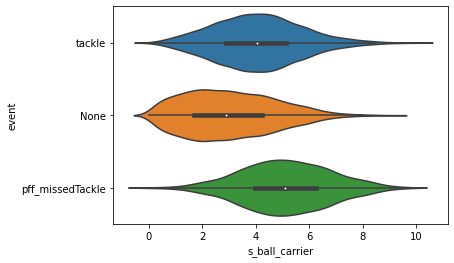

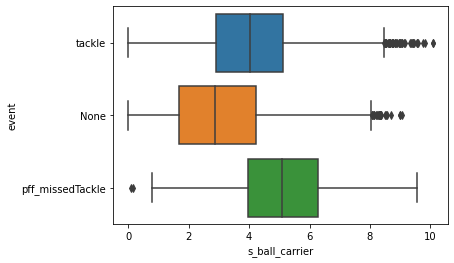

----------------------------------------------------
----------------------------------------------------
a_ball_carrier


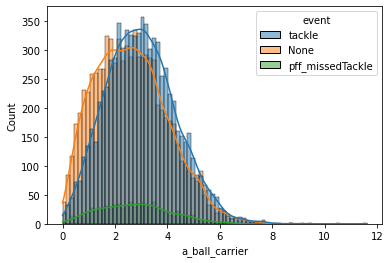

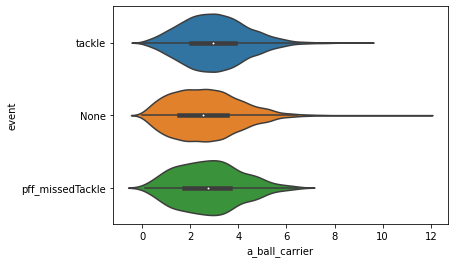

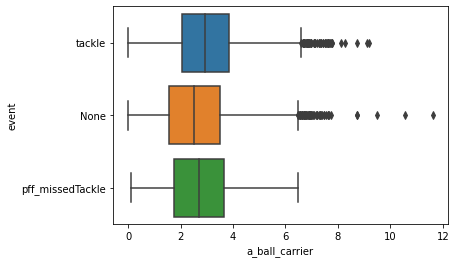

----------------------------------------------------
----------------------------------------------------
dis_ball_carrier


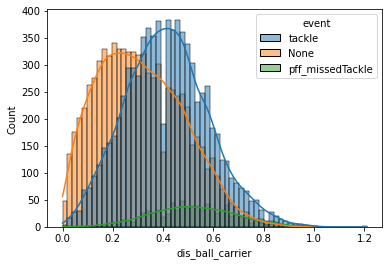

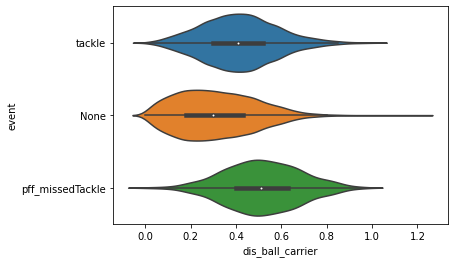

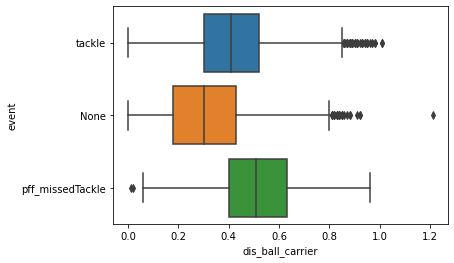

----------------------------------------------------
----------------------------------------------------
o_ball_carrier


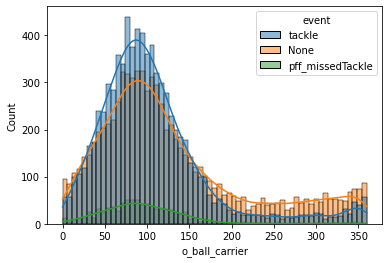

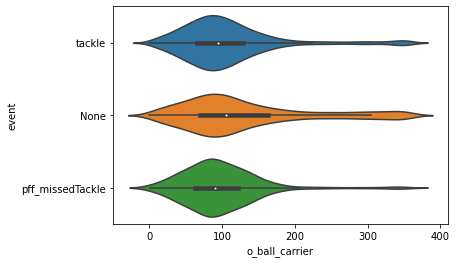

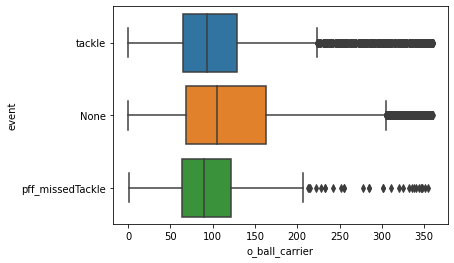

----------------------------------------------------
----------------------------------------------------
dir_ball_carrier


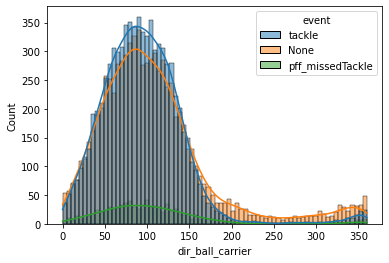

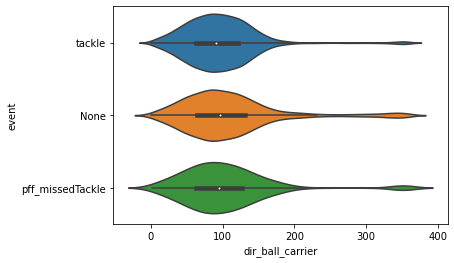

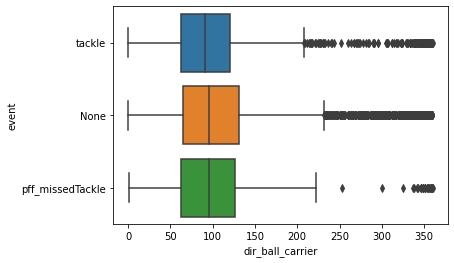

----------------------------------------------------
----------------------------------------------------
force_ball_carrier


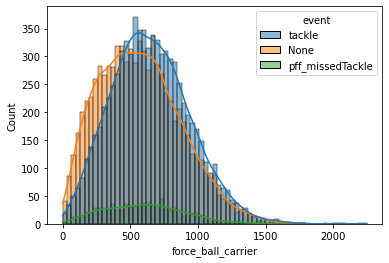

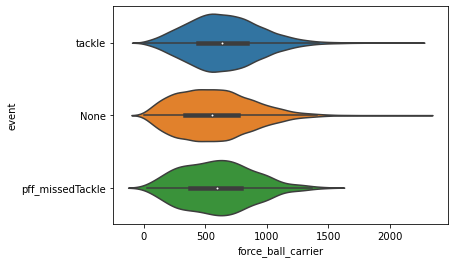

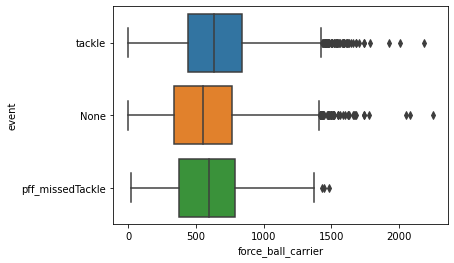

----------------------------------------------------
----------------------------------------------------
force_x_ball_carrier


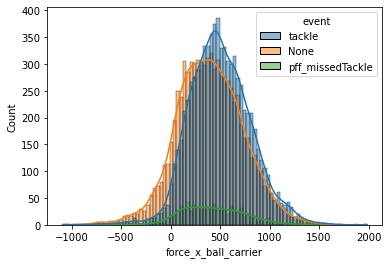

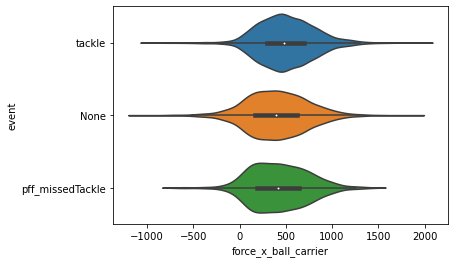

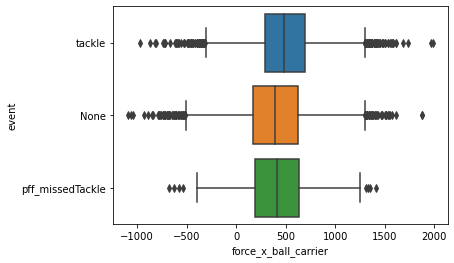

----------------------------------------------------
----------------------------------------------------
force_y_ball_carrier


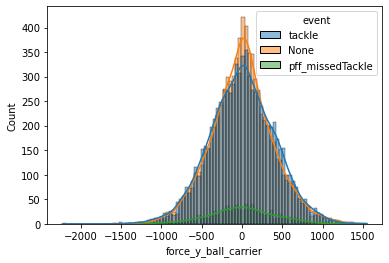

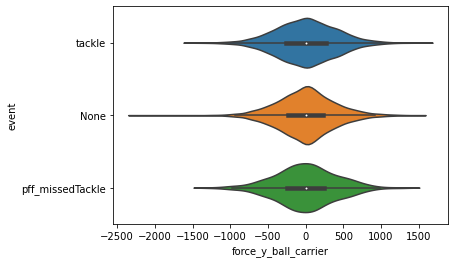

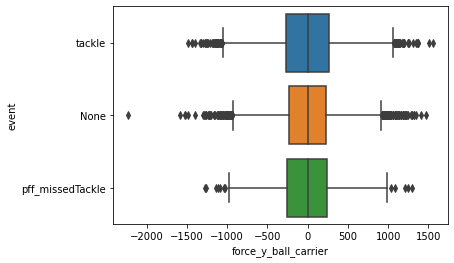

----------------------------------------------------
----------------------------------------------------
momentum_ball_carrier


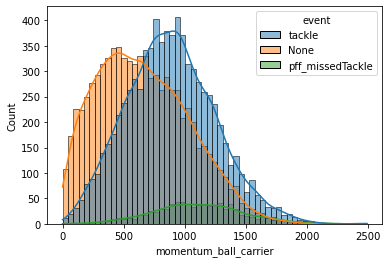

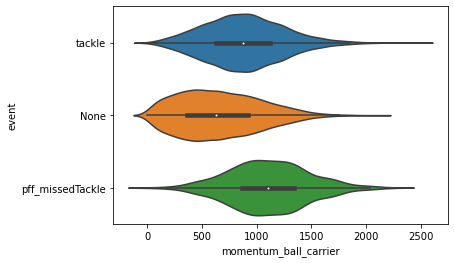

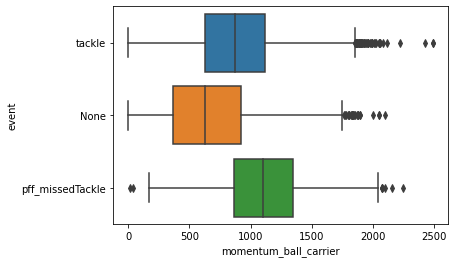

----------------------------------------------------
----------------------------------------------------
momentum_x_ball_carrier


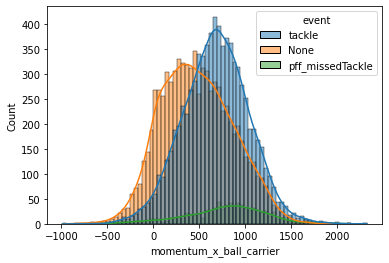

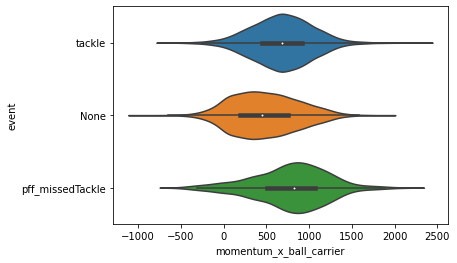

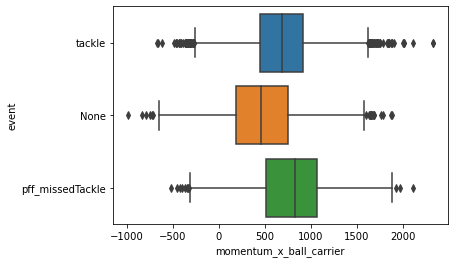

----------------------------------------------------
----------------------------------------------------
momentum_y_ball_carrier


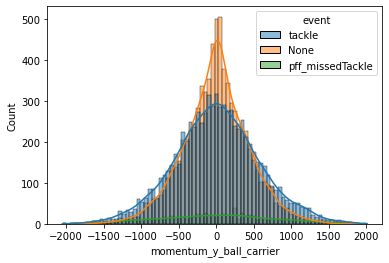

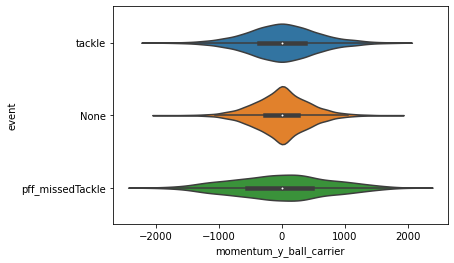

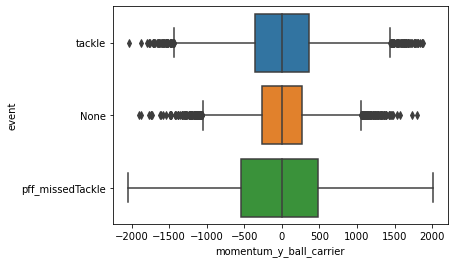

----------------------------------------------------
----------------------------------------------------
contact_angle_cos


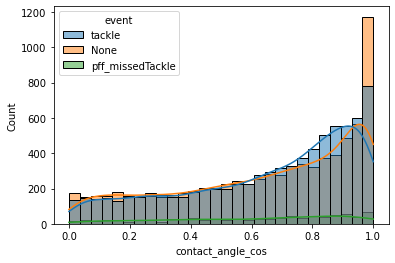

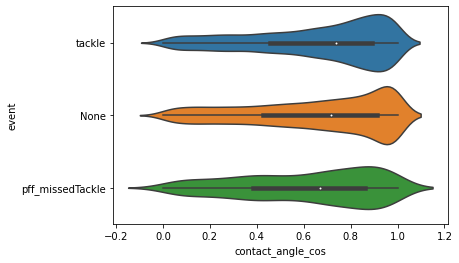

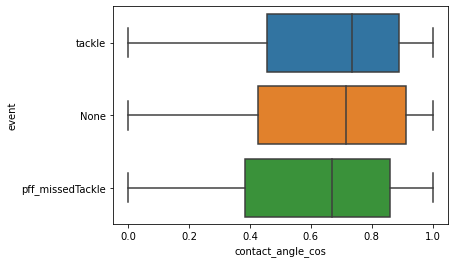

----------------------------------------------------
----------------------------------------------------
contact_angle_force


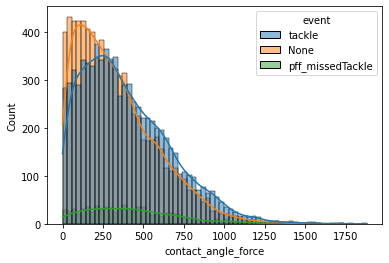

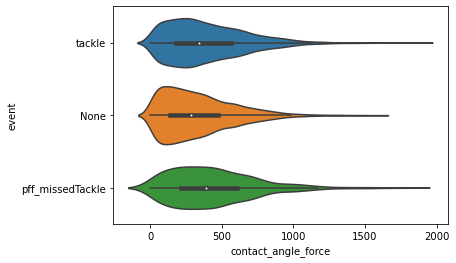

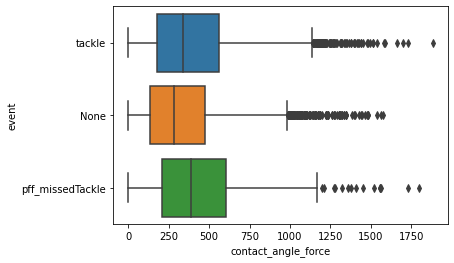

----------------------------------------------------
----------------------------------------------------


In [18]:
for metric in single_player_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

tackler_to_ball_carrier_dist


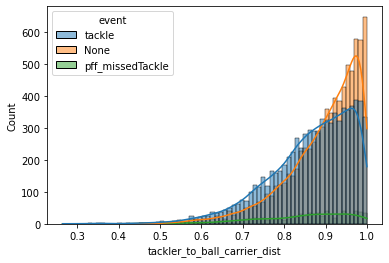

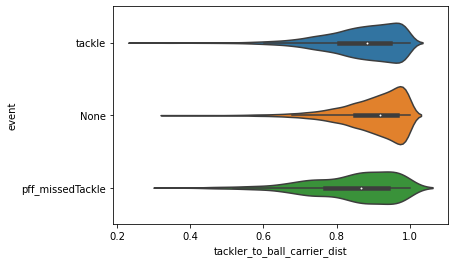

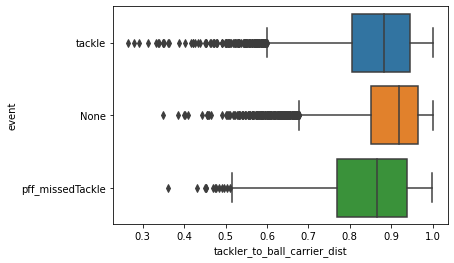

----------------------------------------------------
----------------------------------------------------
force_diff


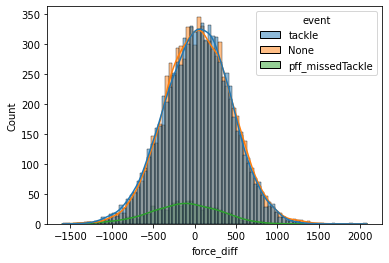

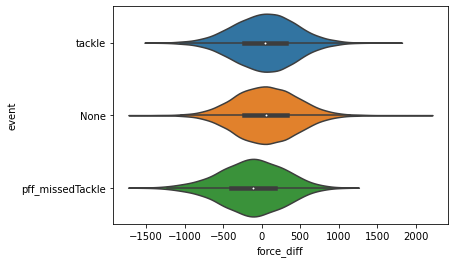

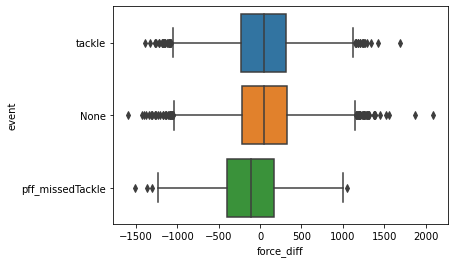

----------------------------------------------------
----------------------------------------------------
force_x_diff


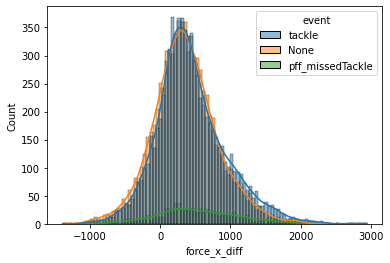

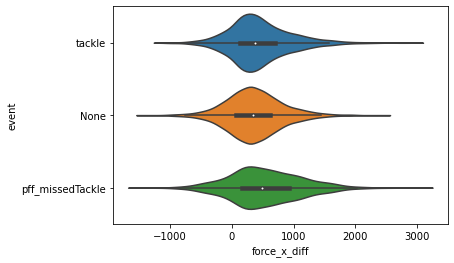

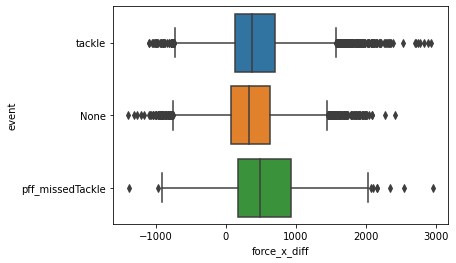

----------------------------------------------------
----------------------------------------------------
force_y_diff


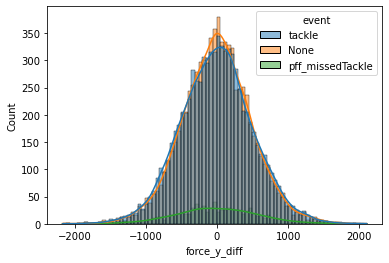

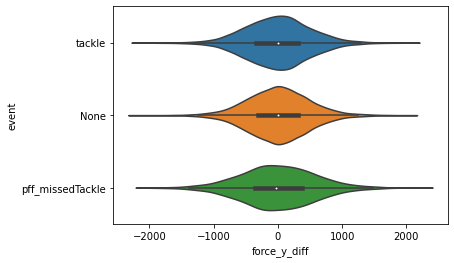

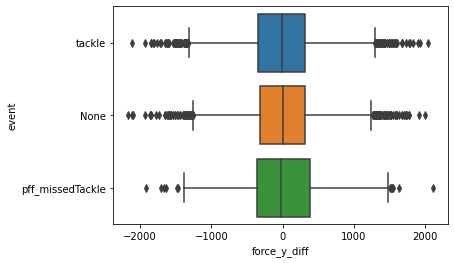

----------------------------------------------------
----------------------------------------------------
momentum_diff


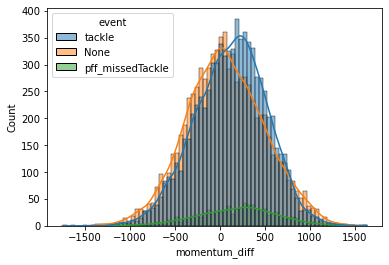

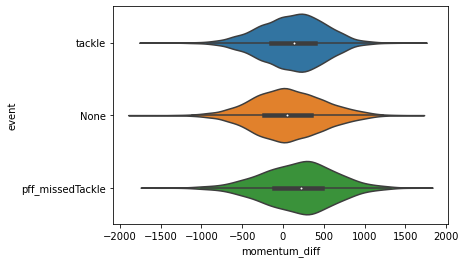

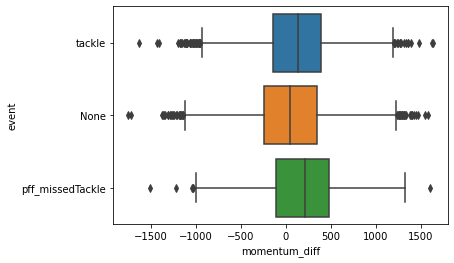

----------------------------------------------------
----------------------------------------------------
momentum_x_diff


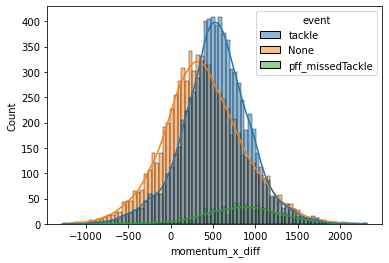

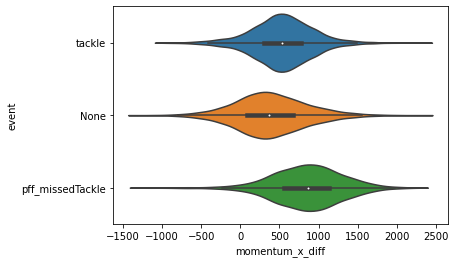

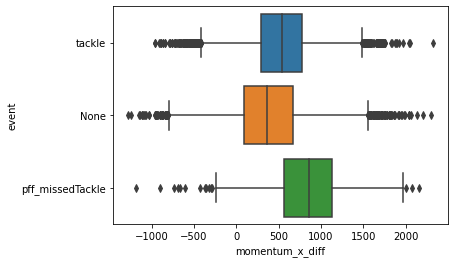

----------------------------------------------------
----------------------------------------------------
momentum_y_diff


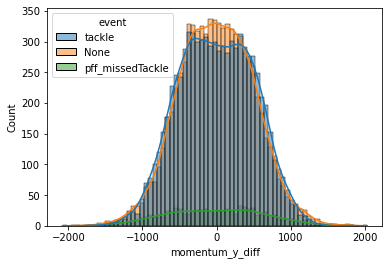

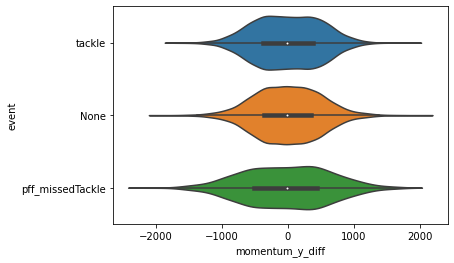

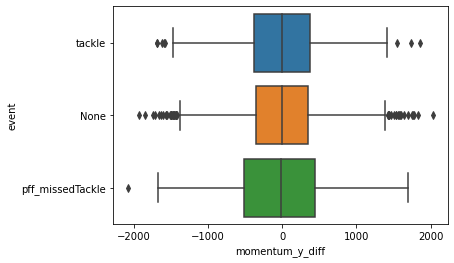

----------------------------------------------------
----------------------------------------------------
x_contact


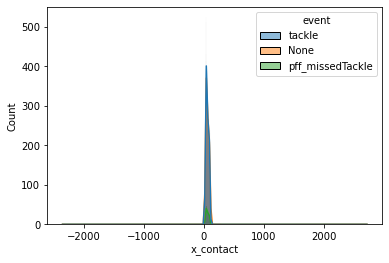

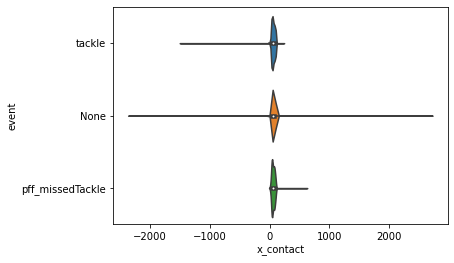

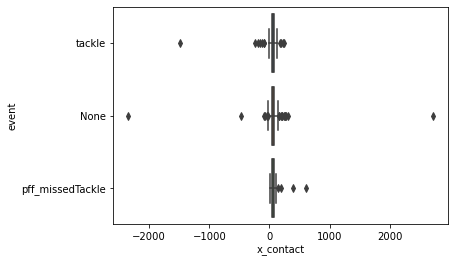

----------------------------------------------------
----------------------------------------------------
y_contact


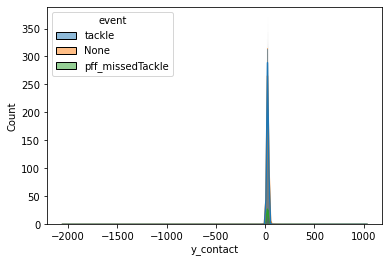

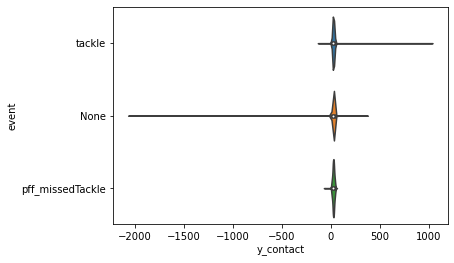

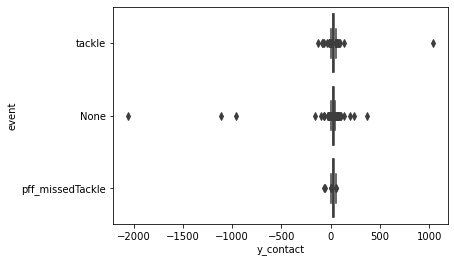

----------------------------------------------------
----------------------------------------------------
tackler_to_contact_dist


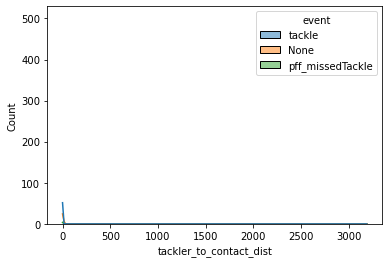

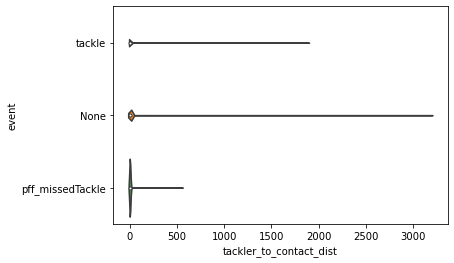

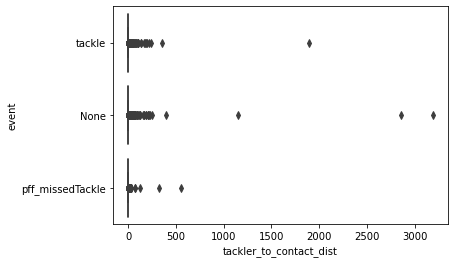

----------------------------------------------------
----------------------------------------------------
ball_carrier_to_contact_dist


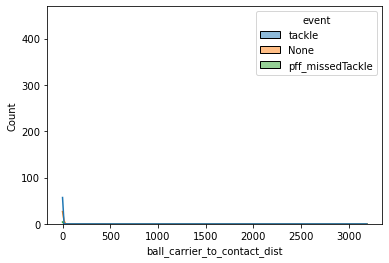

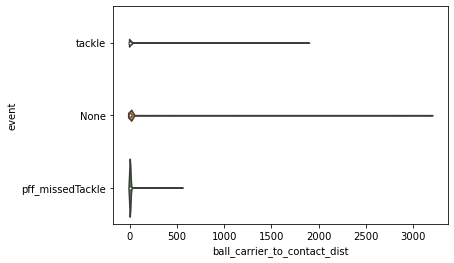

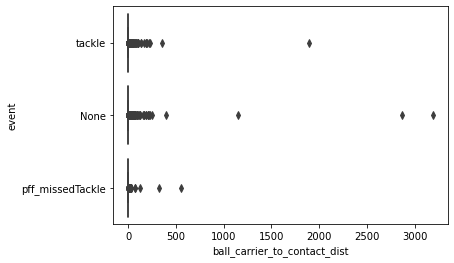

----------------------------------------------------
----------------------------------------------------
tackler_time_to_contact


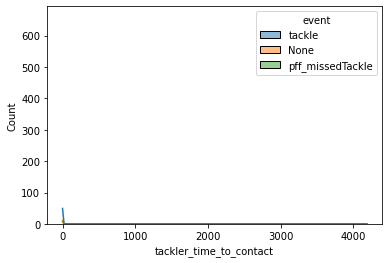

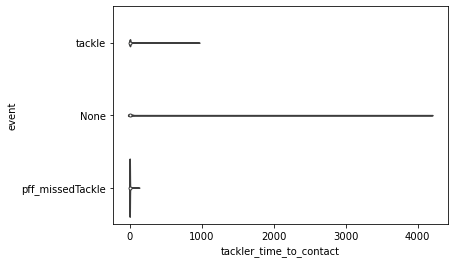

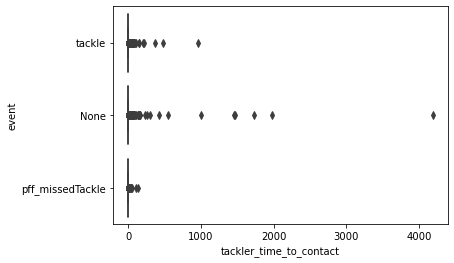

----------------------------------------------------
----------------------------------------------------
ball_carrier_time_to_contact


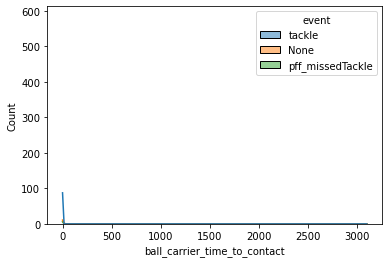

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

In [19]:
for metric in player_diff_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

ball_carrier_time_to_contact


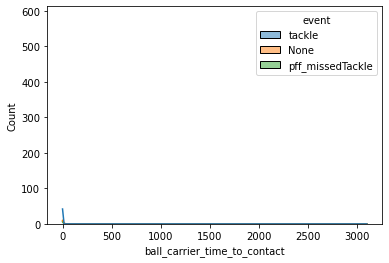

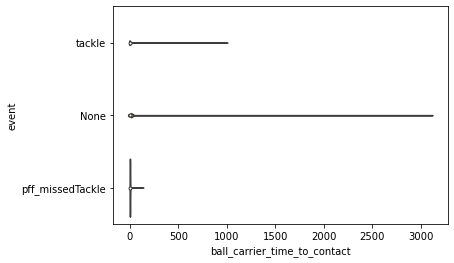

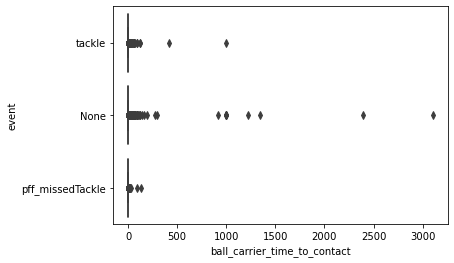

----------------------------------------------------
----------------------------------------------------
diff_time_to_contact


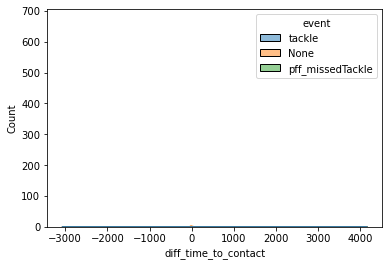

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

In [12]:
metrics_df['ball_carrier_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
remaining_metrics = ['ball_carrier_time_to_contact', 'diff_time_to_contact', 'contact_angle',
       'contact_angle_force_diff']
for metric in remaining_metrics:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

## Contact Distance
Many of the plots surrounding the distance between the players and the contact point are difficult to see because the range is so large. This section explores options to restrict the results to a range when the players are "likely" to make contact.
- Need to determine how removing examples impact the ability to compare groups

In [13]:
# Clip Contact Point
metrics_df[metrics_df['x_contact'] < metrics_df['x'] -1][['x_contact', 'x']]

x_contact      x
38     64.463674  65.54
39     63.066844  64.47
43     79.007053  80.04
66     33.837595  35.02
74     42.774321  44.39
...          ...    ...
16545  71.850216  73.78
16546  69.595074  71.96
16557  81.431472  83.70
16559  85.321776  86.39
16571  47.792216  49.54

[1150 rows x 2 columns]

In [14]:
len(metrics_df)

16584

In [15]:
metrics_df[metrics_df['x_contact'] > 110]['x_contact']

536      110.117900
558      259.978313
597      120.196612
1267     158.932320
1384     110.463178
            ...    
15515    123.759070
15838    312.519191
16242    113.822415
16298    210.135480
16526    122.782237
Name: x_contact, Length: 77, dtype: float64

In [16]:
metrics_df[metrics_df['x_contact'].isna()]['x_contact']

Series([], Name: x_contact, dtype: float64)

In [17]:
metrics_df[metrics_df['x_contact'] > metrics_df['x'] +5][['x_contact', 'x', 'diff_time_to_contact']]

x_contact      x  diff_time_to_contact
19      79.613655  71.35             -1.003038
92      42.503579  30.37             -7.629958
100     85.574423  71.11             -1.922870
109     95.158250  80.58              8.218681
147     42.597379  37.11              2.836266
...           ...    ...                   ...
16442   79.630976  62.94              0.326154
16447   78.869482  71.86              5.576868
16451   36.670669  27.04              4.026244
16526  122.782237  93.13              8.553154
16549   81.680280  73.72              2.159197

[302 rows x 3 columns]

In [18]:
metrics_df['make_contact'].value_counts()

True     16053
False      531
Name: make_contact, dtype: int64

In [19]:
metrics_df[(metrics_df['dir'] < 180) & (metrics_df['x_contact'] < metrics_df['x'] -1)]['event'].value_counts()

None                287
tackle              138
pff_missedTackle     10
Name: event, dtype: int64

In [20]:
metrics_df[~metrics_df['make_contact']]['event'].value_counts()

None                385
tackle              131
pff_missedTackle     15
Name: event, dtype: int64

In [21]:
metrics_df[metrics_df['make_contact']]['event'].value_counts()

tackle              7735
None                7500
pff_missedTackle     818
Name: event, dtype: int64

In [22]:
18/(818+15)

0.021608643457382955

In [23]:
131/(7735+131)

0.01665395372489194

In [24]:
385/(385+7500)

0.04882688649334179

In [25]:
df_contact = metrics_df[metrics_df['make_contact']]

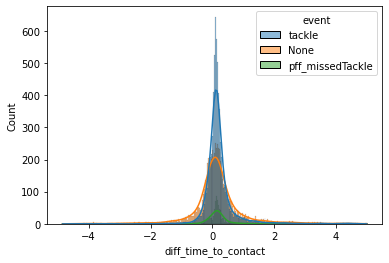

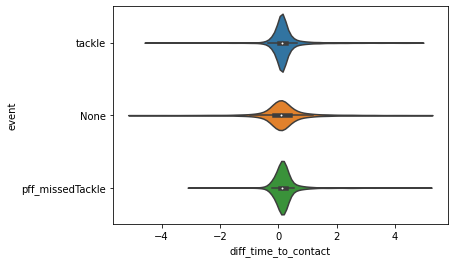

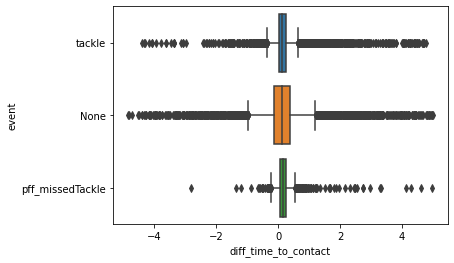

In [26]:
metric = "diff_time_to_contact"
hist(df_contact, metric)
violin(df_contact, metric)
box(df_contact, metric)

tackler_to_ball_carrier_dist


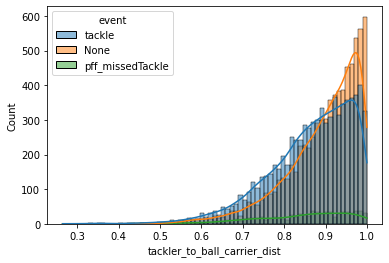

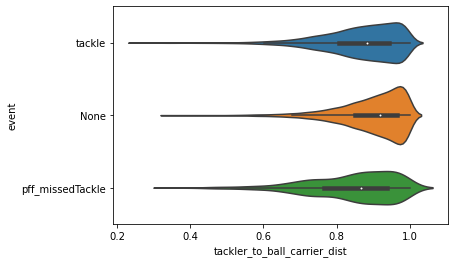

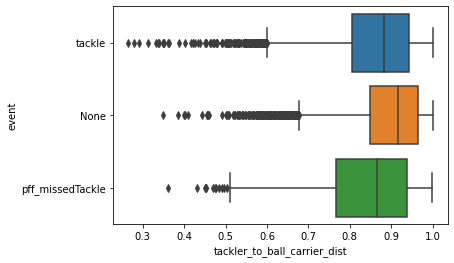

----------------------------------------------------
----------------------------------------------------
force_diff


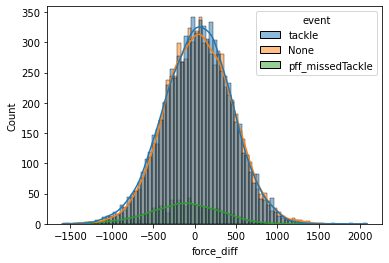

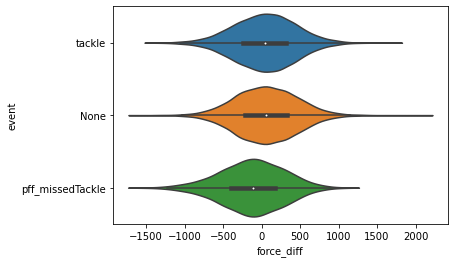

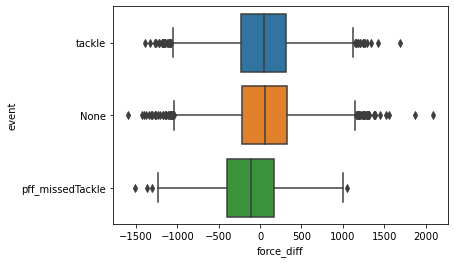

----------------------------------------------------
----------------------------------------------------
force_x_diff


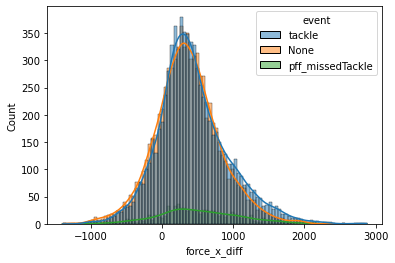

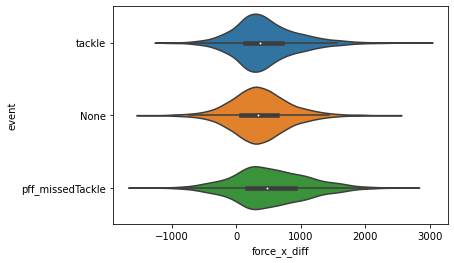

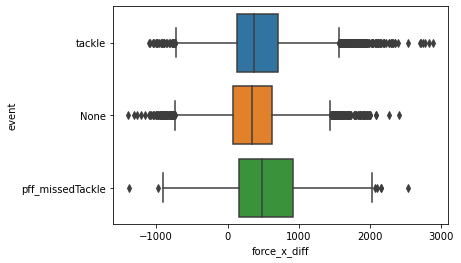

----------------------------------------------------
----------------------------------------------------
force_y_diff


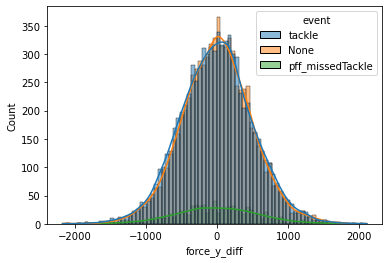

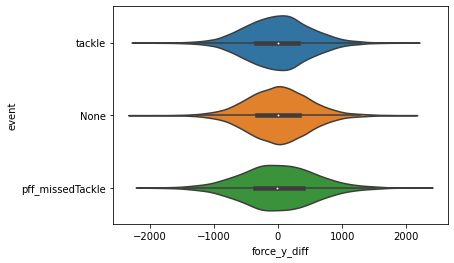

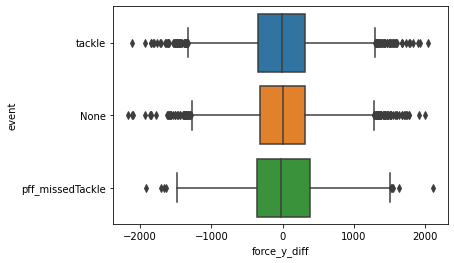

----------------------------------------------------
----------------------------------------------------
momentum_diff


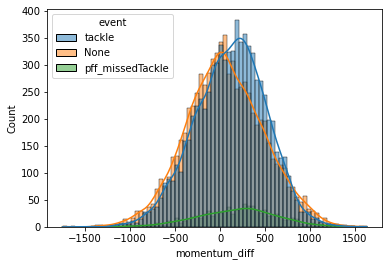

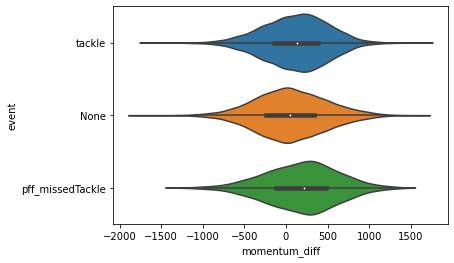

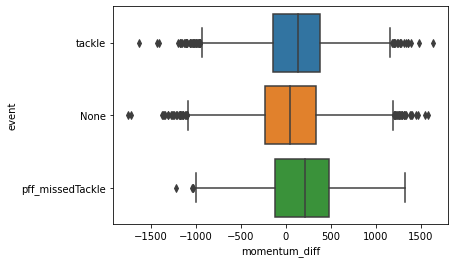

----------------------------------------------------
----------------------------------------------------
momentum_x_diff


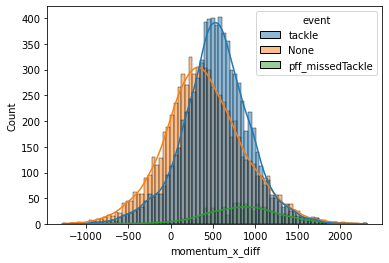

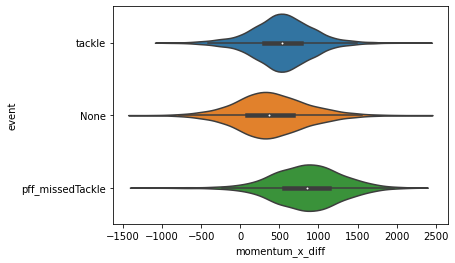

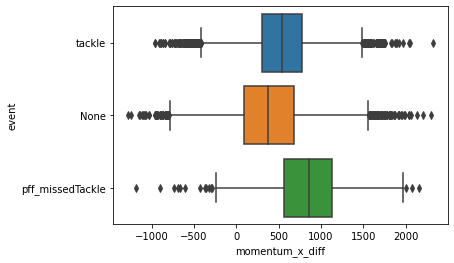

----------------------------------------------------
----------------------------------------------------
momentum_y_diff


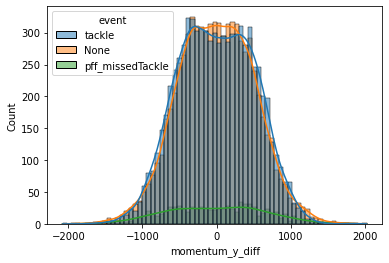

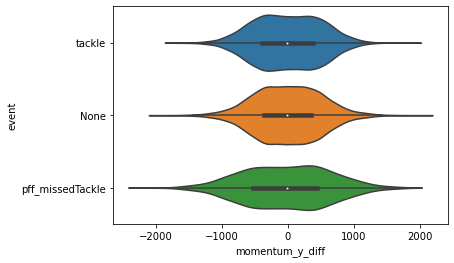

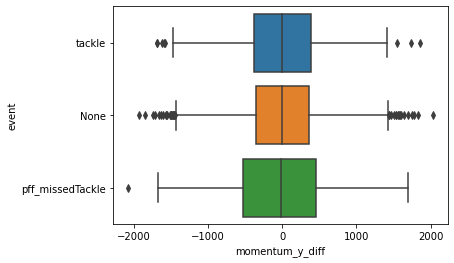

----------------------------------------------------
----------------------------------------------------
x_contact


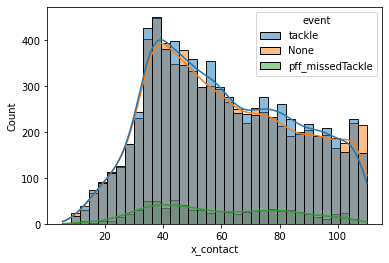

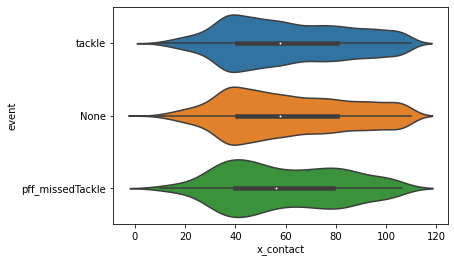

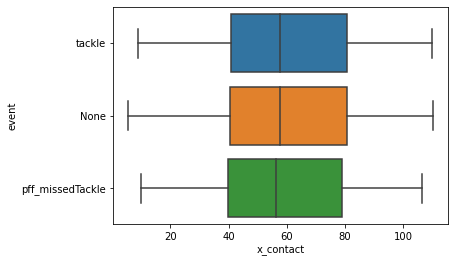

----------------------------------------------------
----------------------------------------------------
y_contact


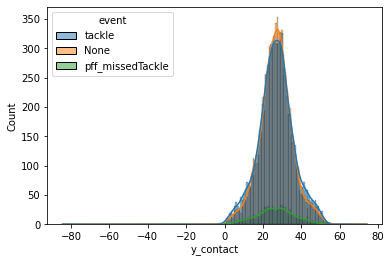

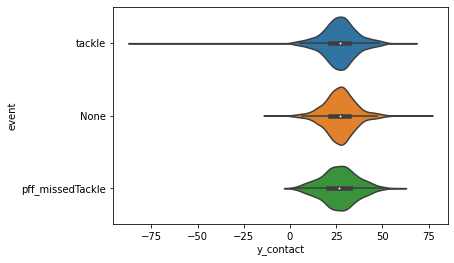

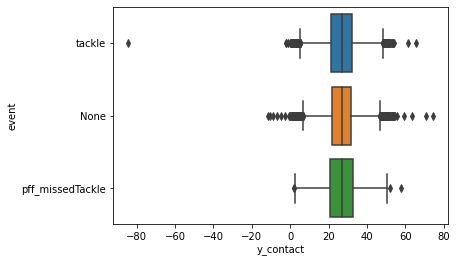

----------------------------------------------------
----------------------------------------------------
tackler_to_contact_dist


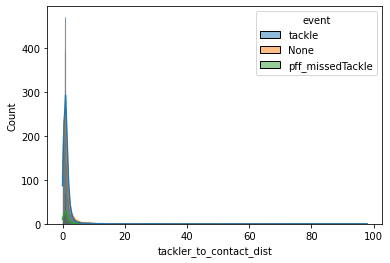

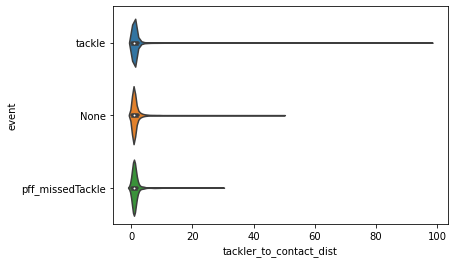

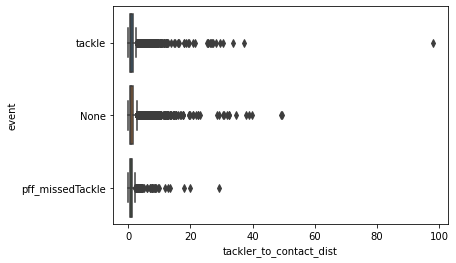

----------------------------------------------------
----------------------------------------------------
ball_carrier_to_contact_dist


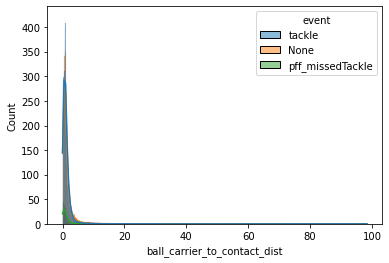

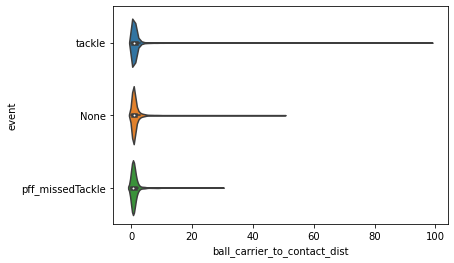

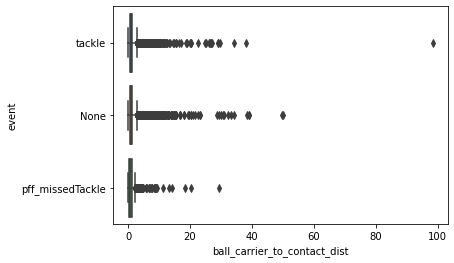

----------------------------------------------------
----------------------------------------------------
tackler_time_to_contact


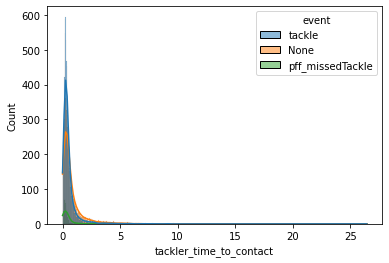

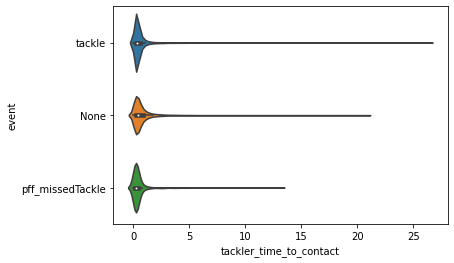

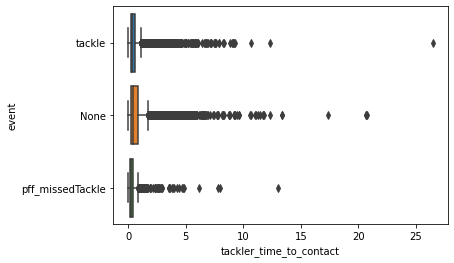

----------------------------------------------------
----------------------------------------------------
ball_carrier_time_to_contact


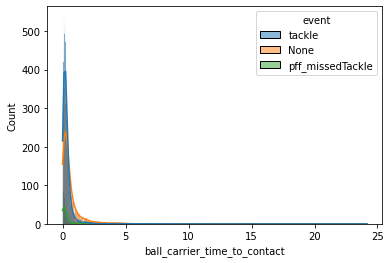

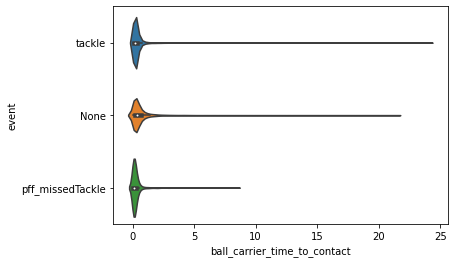

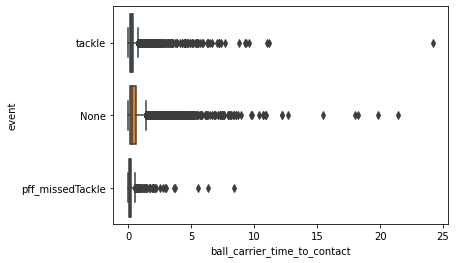

----------------------------------------------------
----------------------------------------------------
diff_time_to_contact


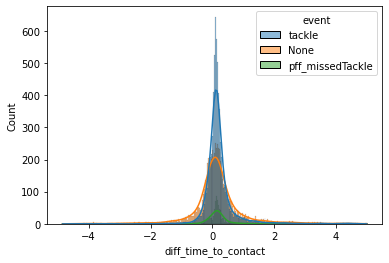

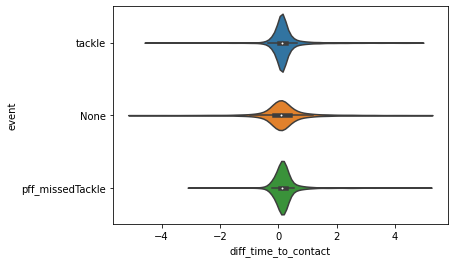

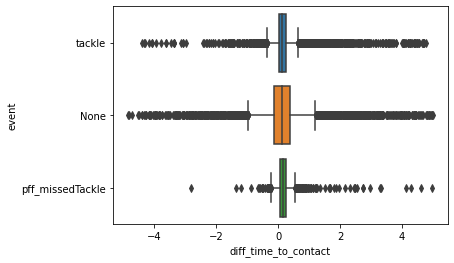

----------------------------------------------------
----------------------------------------------------
contact_angle


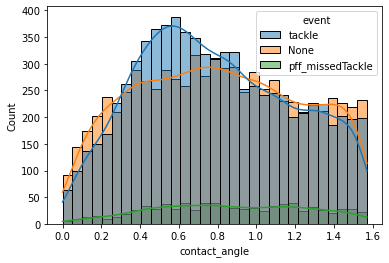

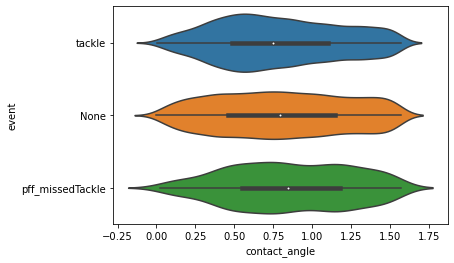

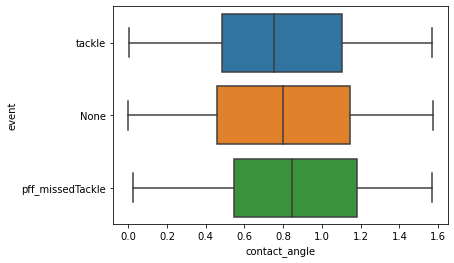

----------------------------------------------------
----------------------------------------------------
contact_angle_force_diff


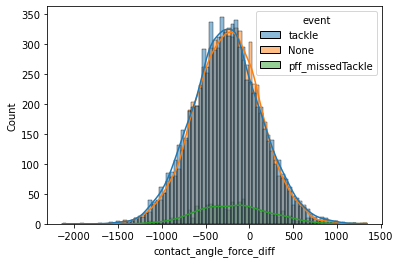

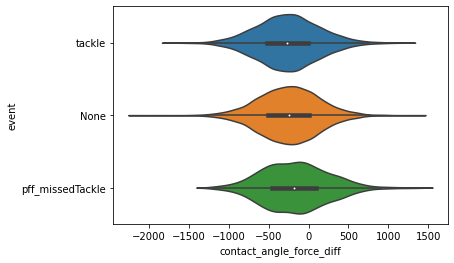

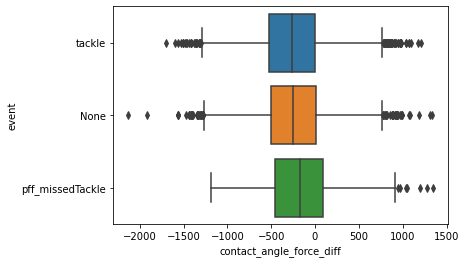

----------------------------------------------------
----------------------------------------------------


In [29]:
for metric in player_diff_metric_columns:
    print(metric)
    hist(df_contact, metric)
    violin(df_contact, metric)
    box(df_contact, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

# More Plotting

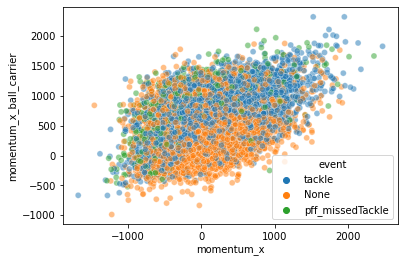

In [30]:
sns.scatterplot(metrics_df, x="momentum_x", y="momentum_x_ball_carrier", hue="event", alpha=0.5)

In [31]:
def regression(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric, y=f"{metric}_ball_carrier", scatter=False)
    plt.show()

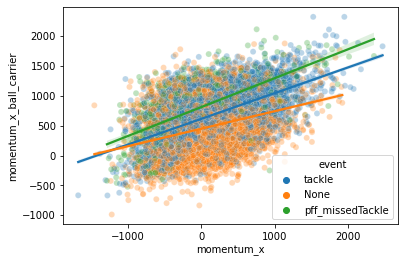

In [32]:
regression(metrics_df, "momentum_x")

In [33]:
scatter_metric_columns = ['x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase']

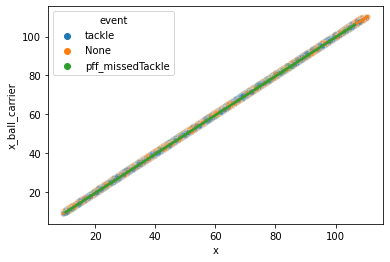

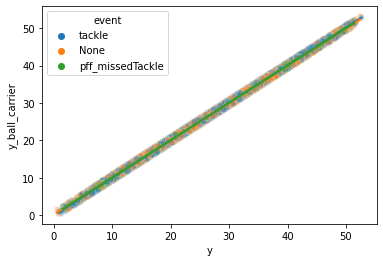

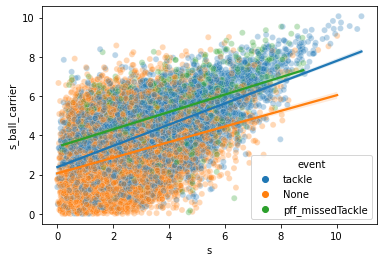

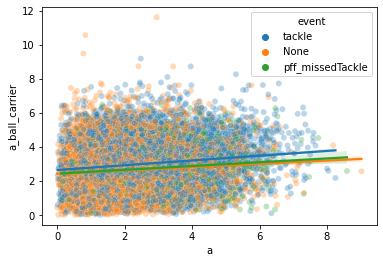

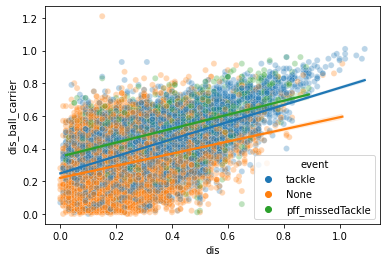

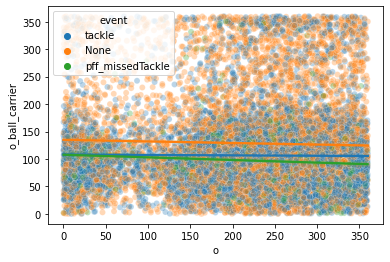

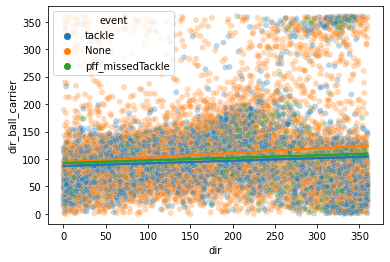

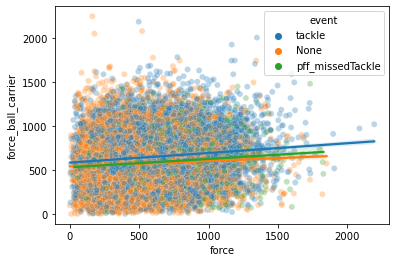

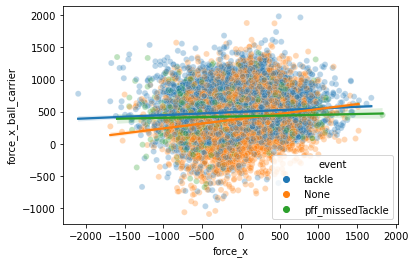

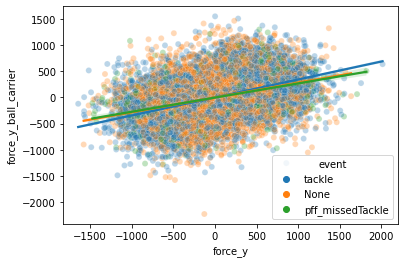

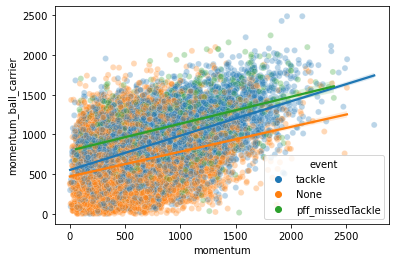

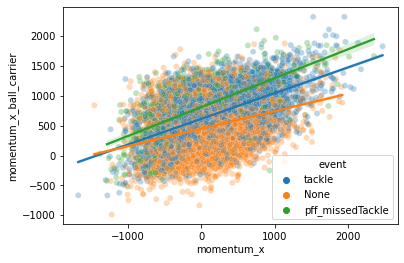

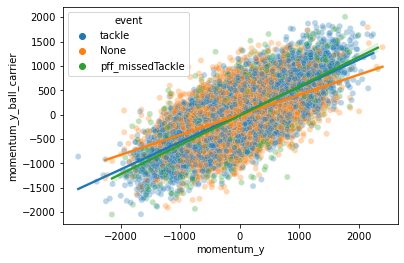

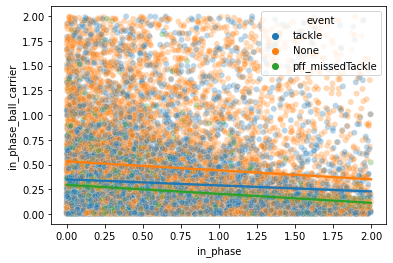

In [34]:
for metric_column in scatter_metric_columns:
    regression(metrics_df, metric_column)